# Find the GT Board in a Video Image

In [3]:
import cv2
import matplotlib.pylab as plt
import numpy as np
from glob import glob

In [ ]:
%load_ext lab_black
plt.style.use('ggplot')

In [4]:
def add_edges(image, area_lim=1000):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    contours,_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    max_area = 0
    c = 0
    for i in contours:
        area = cv2.contourArea(cv2.UMat(i))
        if area > area_lim:
            if area > max_area:
                max_area = area
                best_cnt = i
                image = cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1

    mask = np.zeros((gray.shape),np.uint8)
    cv2.drawContours(mask,[best_cnt],0,255,-1)
    cv2.drawContours(mask,[best_cnt],0,0,2)

    out = np.zeros_like(gray)
    out[mask == 255] = gray[mask == 255]
    blur = cv2.GaussianBlur(out, (11,11), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

    c = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 1000/2:
            cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1
    return image

In [5]:
imgs = glob('temp/*.png')

In [15]:
# imgs

# Pull the IRL Board

In [9]:
example_img = cv2.imread(imgs[0])

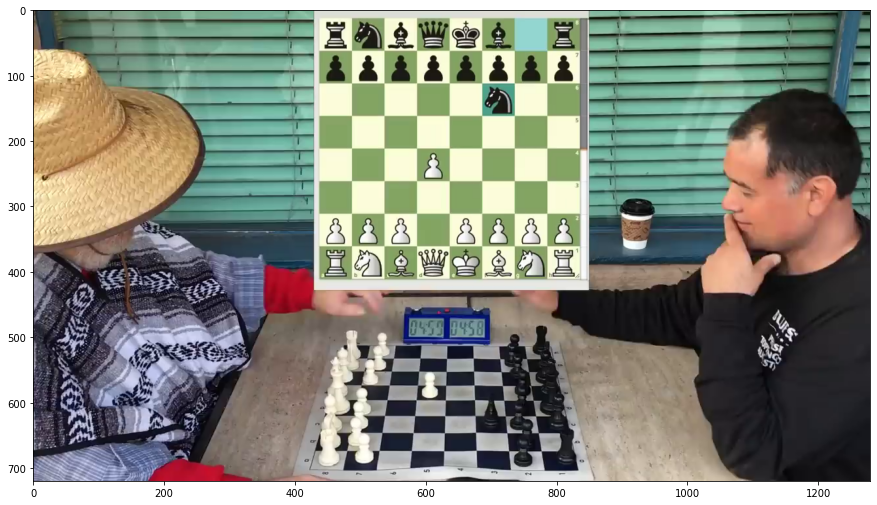

In [16]:
example_img_ = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(example_img_)

# Harris Corner Detection
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

In [59]:
from sklearn.preprocessing import MinMaxScaler

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


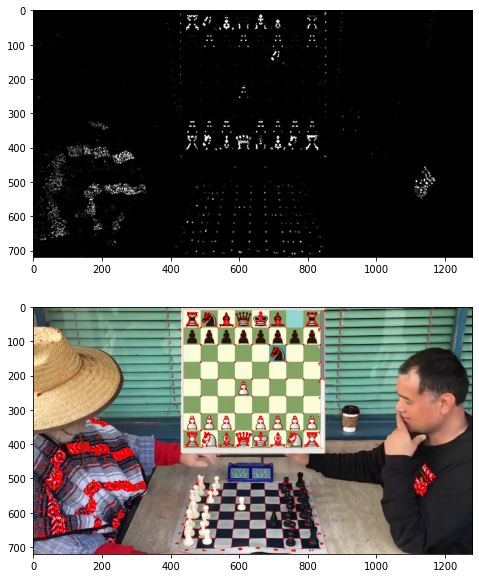

In [65]:
thres = 0.01
img = cv2.imread(imgs[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>thres*dst.max()]=[0,0,255]

dst_norm = dst / (dst.max() / 5)

# mm = MinMaxScaler()
# dst_norm = mm.fit_transform(dst) * 255

plt_img1 = cv2.cvtColor(dst_norm, cv2.COLOR_BGR2RGB)
plt_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].imshow(plt_img1)
axs[1].imshow(plt_img2)

In [80]:
import cv2
import numpy as np

# filename = 'chessboard2.jpg'
img = cv2.imread(imgs[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# for y in range(0, gray.shape[0]):
#     for x in range(0, gray.shape[1]):
#         harris = cv2.cv.Get2D(cv2.cv.fromarray(dst), y, x) # get the x,y value
#         # check the corner detector response
#         if harris[0] > 0.01*dst.max():
#             print(x,y) # these are the locations of the matches
#             print('Distance in pixels from origin: %d' % math.sqrt(x**2+y**2))
#             # draw a small circle on the original image
#             cv2.circle(img,(x,y),2,(155, 0, 25))

# # find centroids
# ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# # define the criteria to stop and refine the corners
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# # Now draw them
# res = np.hstack((centroids,corners))
# res = np.int0(res)
# img[res[:,1],res[:,0]]=[0,0,255]
# img[res[:,3],res[:,2]] = [0,255,0]

# fig, ax = plt.subplots(figsize=(10, 10))
# plt_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# ax.imshow(plt_img2)
# # axs[1].imshow(plt_img2)

In [81]:
# corners = cv2.goodFeaturesToTrack(img, 4, 0.5, 10)

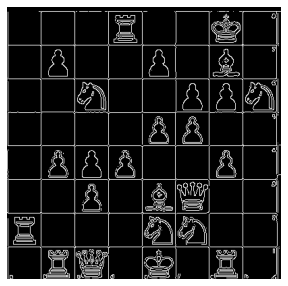

In [240]:
template = cv2.imread("../data/processed/u-6gXgzNM6s/gt/u-6gXgzNM6s_15002.jpg")
template = cv2.Canny(template, 100, 100)

plt_img = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(plt_img)
ax.axis("off")
plt.show()

In [262]:
def template_match(
    img_fn=imgs[0],
    threshold=0.5,
    template_fn="../data/processed/u-6gXgzNM6s/gt/u-6gXgzNM6s_10007.jpg",
    plot=True,
):
    img_rgb = cv2.imread(img_fn)
    img_rgb = cv2.resize(img_rgb, (1280, 720))

    # img_gray = cv2.Canny(img_rgb, 100, 100)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(template_fn)
    # template = cv2.Canny(template, 100, 100)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    x, y = np.median(loc, axis=1)
    try:
        x, y = int(x), int(y)
    except:
        print(f"failed {img_fn}")
        return
    if plot:
        img_rgb = cv2.imread(img_fn)
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        plt_img = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
        axs[0].imshow(plt_img)
        axs[0].axis("off")
        # plt.show()

        print(f"GT Board Location: {x, y, h, w}")
        plt_img = cv2.cvtColor(img_rgb[x : x + h, y : y + w, :], cv2.COLOR_BGR2RGB)
        axs[1].imshow(plt_img)
        axs[1].axis("off")
        plt.show()
    return x, y, h, w

AttributeError: 'AxesImage' object has no attribute 'axis'

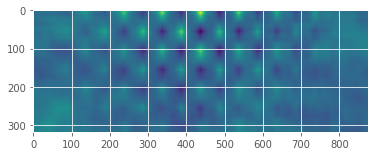

In [273]:
ax = plt.imshow(res)
ax.axis('off')

In [280]:
# 42

<AxesSubplot:ylabel='Frequency'>

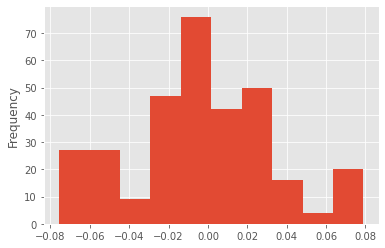

In [278]:
import pandas as pd

pd.DataFrame(res)[0].plot(kind="hist")

GT Board Location: (49, 533, 403, 406)


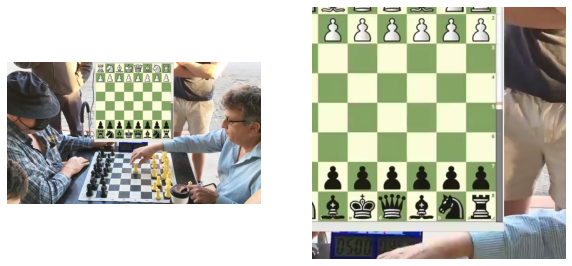

(49, 533, 403, 406)

In [269]:
template_match("temp/vjl9x9GiGKE_example_frame.png", threshold=0.15)

In [ ]:
for img_fn in imgs:
    template_match(img_fn, threshold=0.3)

In [231]:
# template_match("jw_example.jpg", threshold=0.05)

In [232]:
# template_match("Screenshot from 2022-04-03 23-15-09.png", threshold=0.2)